In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=dataset.iloc[:,[3,4]].values

In [5]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(n_clusters=8,init='k-means++')
label=kmeans.fit_predict(x)
label

array([4, 3, 0, 3, 4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4, 3, 4, 3, 4, 3,
       0, 3, 0, 3, 4, 3, 4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4, 3, 4, 3, 4, 5,
       4, 3, 5, 4, 4, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 1, 2, 1, 2, 1, 7, 1, 7, 1,
       2, 1, 7, 1, 7, 1, 7, 1, 7, 1, 2, 1, 7, 1, 2, 1, 7, 1, 7, 1, 7, 1,
       7, 1, 7, 1, 7, 1, 2, 1, 7, 1, 2, 1, 7, 1, 2, 1, 7, 1, 7, 1, 7, 1,
       7, 1, 7, 1, 2, 1, 6, 1, 2, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1,
       6, 1])

In [7]:
centroids=kmeans.cluster_centers_

In [8]:
centroids

array([[ 24.28252788,   9.65799257],
       [ 86.12514092,  81.97068771],
       [ 80.11489362,  33.28085106],
       [ 25.44163424,  79.01945525],
       [ 32.74712644,  36.71551724],
       [ 55.47848761,  50.42112125],
       [113.4321608 ,  18.47738693],
       [ 79.75845411,  11.23429952]])

In [9]:
supervised=dataset

In [10]:
supervised['cluster_groups']=label

In [11]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_groups
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,6
197,198,Male,32,126,74,1
198,199,Male,32,137,18,6


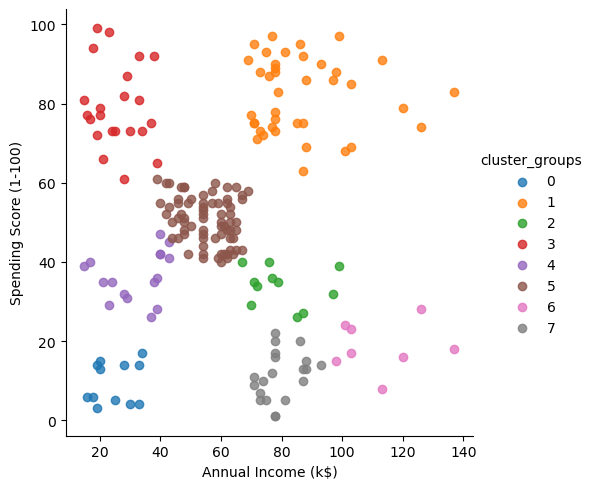

In [12]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],
                 hue=supervised.columns[5],fit_reg=False,legend=True)